In [8]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

%run -i marsh_funcs.py

In [7]:
# here is a rotated grid
dxg = 30.
dyg = 30.
lenxg = 1600.
lenyg = 3200.
xg = np.arange( 0, lenxg+dxg, dxg )
yg = np.arange( 0, lenyg+dyg, dyg )

print(xg)
print(yg)
xrg, yrg = np.meshgrid( xg, yg )
print(xrg)

[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.
  360.  390.  420.  450.  480.  510.  540.  570.  600.  630.  660.  690.
  720.  750.  780.  810.  840.  870.  900.  930.  960.  990. 1020. 1050.
 1080. 1110. 1140. 1170. 1200. 1230. 1260. 1290. 1320. 1350. 1380. 1410.
 1440. 1470. 1500. 1530. 1560. 1590. 1620.]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.
  360.  390.  420.  450.  480.  510.  540.  570.  600.  630.  660.  690.
  720.  750.  780.  810.  840.  870.  900.  930.  960.  990. 1020. 1050.
 1080. 1110. 1140. 1170. 1200. 1230. 1260. 1290. 1320. 1350. 1380. 1410.
 1440. 1470. 1500. 1530. 1560. 1590. 1620. 1650. 1680. 1710. 1740. 1770.
 1800. 1830. 1860. 1890. 1920. 1950. 1980. 2010. 2040. 2070. 2100. 2130.
 2160. 2190. 2220. 2250. 2280. 2310. 2340. 2370. 2400. 2430. 2460. 2490.
 2520. 2550. 2580. 2610. 2640. 2670. 2700. 2730. 2760. 2790. 2820. 2850.
 2880. 2910. 2940. 2970. 3000. 3030. 3060. 3090. 3120. 3150. 3180. 3210.]
[[   0

In [18]:
# lat/lon for lower left corner, and azimuth of grid (CCW from due east)
ll_lat = 38.00
ll_lon = -75.445
theta = -25.
# convert ll corner to UTM18
geo_to_utm18 = Transformer.from_crs( 'epsg:26918', 'epsg:4326', always_xy=True ) # UTM18 to WGS84
e0, n0 = geo_to_utm18.transform( ll_lon, ll_lat)
print(e0, n0 )
xu, yu, xrot, yrot, xcoords, ycoords = make_grid(name='assateague', e0=e0, n0=n0, xlen=500*30, ylen=1000*30, dxdy=30, theta=theta)

-79.48941979565643 0.0003427359611820175
make_grid: Shape of xrot, yrot:  (1000, 500) (1000, 500)
corners x, corners y]
[[-5.95555291e+01  7.25568562e+00]
 [ 1.35078720e+04 -6.31933969e+03]
 [ 2.61737413e+04  2.08427047e+04]
 [ 1.26063138e+04  2.71693001e+04]
 [-5.95555291e+01  7.25568562e+00]]
Saving to assateague.csv


In [2]:
# read the data
# 2014 https://www.sciencebase.gov/catalog/item/5e4d5ed3e4b0ff554f6d1833
# 2018 https://www.sciencebase.gov/catalog/item/5e4d644ae4b0ff554f6d5473
infile = 'L8_2018_ATL_Unveg_Veg_Water_UVVR.tif'
r1 = rioxarray.open_rasterio( infile )
r1

<xarray.DataArray (band: 4, y: 74925, x: 60625)> Size: 73GB
[18169312500 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 485kB -82.36 -82.35 -82.35 ... -66.02 -66.02 -66.02
  * y            (y) float64 599kB 45.39 45.39 45.39 45.39 ... 25.2 25.2 25.2
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    _FillValue:          -inf
    scale_factor:        1.0
    add_offset:          0.0

### This approach takes a long time and then runs out of memory
```
assateague_geom = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [-75.425, 38.015],[-75.401, 38.015],[-75.401, 38.187],[-75.425, 38.127],[-75.425, 38.015]
        ]]
    }
]
a = r1.rio.clip( assateague_geom ) 
```        

In [3]:
g = {'name':'Assateague',
     'minx': -75.625, 'maxx':75.201,
     'miny': 38.015,  'maxy': 38.127,
     'ang': 100 }
print(g)
#a = r1.rio.clip_box( minx =-75.625, miny = 38.015, maxx=-75.201, maxy=38.127 )

{'name': 'Assateague', 'minx': -75.625, 'maxx': 75.201, 'miny': 38.015, 'maxy': 38.127, 'ang': 100}


In [4]:
a

<xarray.DataArray (band: 4, y: 416, x: 1574)> Size: 10MB
[2619136 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 13kB -75.62 -75.62 -75.62 ... -75.2 -75.2 -75.2
  * y            (y) float64 3kB 38.13 38.13 38.13 38.13 ... 38.02 38.02 38.02
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -inf

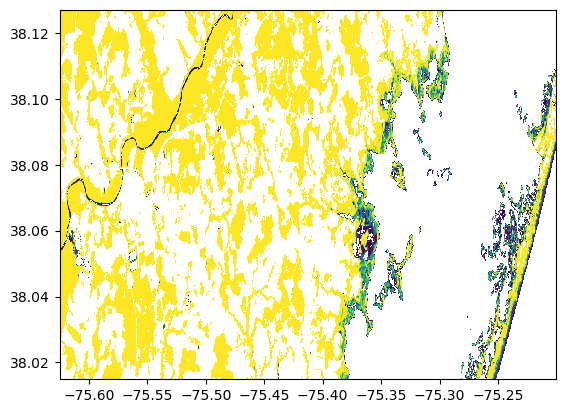

In [5]:
plt.pcolormesh(a.x.values, a.y.values, a[1,:,:].values)

In [6]:
asum = np.mean( np.squeeze( a[2,:,:] ) , axis=0 )

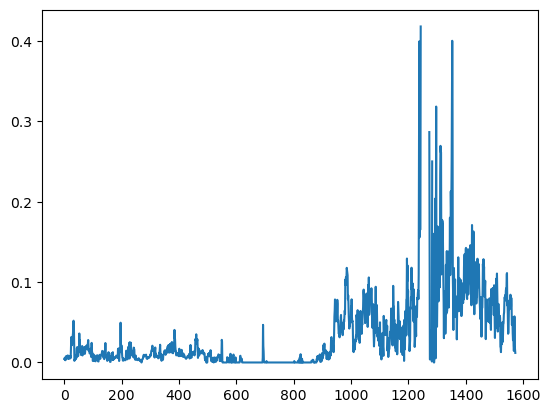

In [7]:
plt.plot(asum)